In [1]:
import pandas as pd
import numpy as np

import sklearn 

from numpy import mean
from numpy import std

from sklearn.preprocessing import StandardScaler

from sklearn import linear_model

#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import make_scorer

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Basic Dummified Dataset for Linear Models
base = pd.read_csv('../../Data/BaseData.csv')
base.shape

(2580, 299)

In [3]:
X = base[['GrLivArea', 'OverallQual']]
y = base.SalePrice.values.reshape(-1,1)

#scaler = StandardScaler()
#X = scaler.fit_transform(X)
#y=np.log10(y)

In [4]:
multiple = linear_model.LinearRegression()

In [5]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error'}

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
MLR = evaluate_model(multiple, X,y)
MLR

,fit_time,score_time,test_r2,test_neg_mae
0,0.003853,0.002704,0.721532,-28164.878506
1,0.009916,0.003030,0.714287,-27049.224160
2,0.004740,0.000943,0.736684,-27698.322385
3,0.009314,0.001332,0.755845,-26511.236741
4,0.005496,0.002793,0.751330,-27340.893252
5,0.003069,0.001129,0.724462,-28806.026900
6,0.003438,0.001167,0.782182,-24750.067055
7,0.002647,0.000815,0.724543,-27617.820371
8,0.004880,0.001099,0.747638,-26896.146585
9,0.005973,0.001124,0.708893,-28626.371665


In [8]:
#SLR = SLR[0][['test_r2', 'test_neg_mae']]
MLR = MLR.assign(MAE = MLR['test_neg_mae'].abs())
MLR = MLR.rename(columns = {'test_r2':'MLR R2', 'MAE':'MLR MAE'})
MLR

,fit_time,score_time,MLR R2,test_neg_mae,MLR MAE
0,0.003853,0.002704,0.721532,-28164.878506,28164.878506
1,0.009916,0.003030,0.714287,-27049.224160,27049.224160
2,0.004740,0.000943,0.736684,-27698.322385,27698.322385
3,0.009314,0.001332,0.755845,-26511.236741,26511.236741
4,0.005496,0.002793,0.751330,-27340.893252,27340.893252
5,0.003069,0.001129,0.724462,-28806.026900,28806.026900
6,0.003438,0.001167,0.782182,-24750.067055,24750.067055
7,0.002647,0.000815,0.724543,-27617.820371,27617.820371
8,0.004880,0.001099,0.747638,-26896.146585,26896.146585
9,0.005973,0.001124,0.708893,-28626.371665,28626.371665


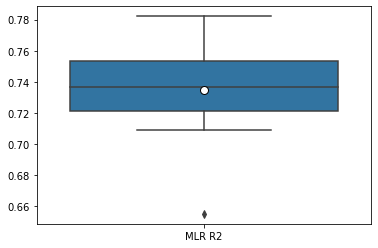

In [9]:
sns.boxplot(data=MLR[['MLR R2']], showmeans=True,
           meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"8"});

In [10]:
MLR.describe()

,fit_time,score_time,MLR R2,test_neg_mae,MLR MAE
count,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.004845,0.001485,0.734588,-27377.157892,27377.157892
std,0.002294,0.000752,0.030715,1402.282462,1402.282462
min,0.002117,0.000815,0.654818,-30425.541337,24750.067055
25%,0.003254,0.001050,0.720893,-28253.899529,26461.505536
50%,0.004740,0.001124,0.736684,-27340.893252,27340.893252
75%,0.005591,0.001656,0.753587,-26461.505536,28253.899529
max,0.009916,0.003030,0.782182,-24750.067055,30425.541337


In [11]:
MLR.to_csv('MLR.csv', index=False)

In [12]:
#sklearn.metrics.SCORERS.keys()

In [13]:
simple.fit(X,y)
response = simple.predict(X)
r2 = simple.score(X,y)

In [14]:
response

array([[108407.79344931],
       [129744.22416267],
       [124437.75434795],
       ...,
       [235099.76027576],
       [217411.52756002],
       [225039.57791868]])

In [15]:
r2

0.5183732056699005

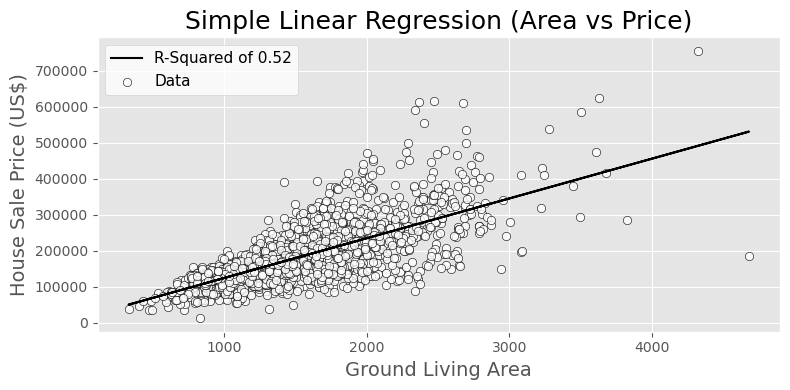

In [45]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='R-Squared of 0.52')
ax.scatter(X, y, edgecolor='k', facecolor='white', alpha=0.8, label='Data')
ax.set_ylabel('House Sale Price (US$)', fontsize=14)
ax.set_xlabel('Ground Living Area', fontsize=14)
#ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple Linear Regression (Area vs Price)', fontsize = 18)
#ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

In [68]:
x = base[["GrLivArea"]]
y = base.SalePrice

In [69]:
x_constant = sm.add_constant(x)

In [70]:
#Run OLS with statsmodels
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     2775.
Date:                Mon, 23 May 2022   Prob (F-statistic):               0.00
Time:                        07:18:47   Log-Likelihood:                -31680.
No. Observations:                2580   AIC:                         6.336e+04
Df Residuals:                    2578   BIC:                         6.338e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.378e+04   3283.025      4.196      0.000    7338.116    2.02e+04
GrLivArea    110.5515      2.099     52.675      0.000     106.436     114.667
==============================================================================
Omnibus:                      566.834   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3369.606
Skew:                           0.903   Prob(JB):                         0.00
Kurtosis:                       8.299   Cond. No.                     5.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
from scipy import stats
import statsmodels.api as sm

def normality_of_residuals_test(model):
    '''
    Function for drawing the normal QQ-plot of the residuals and running 4 statistical tests to 
    investigate the normality of residuals.
    
    Arg:
    * model - fitted OLS models from statsmodels
    '''
    sm.ProbPlot(model.resid).qqplot(line='s', fmt='k', markeredgecolor='k', markerfacecolor='white', markersize=2, alpha=0.8);
    plt.title('Q-Q plot, Simple Linear Regression (Area vs Price)');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
#normality_of_residuals_test(lin_reg)

Jarque-Bera test ---- statistic: 3369.6063, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9273, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.5209, p-value: 0.0000
Anderson-Darling test ---- statistic: 38.9221, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


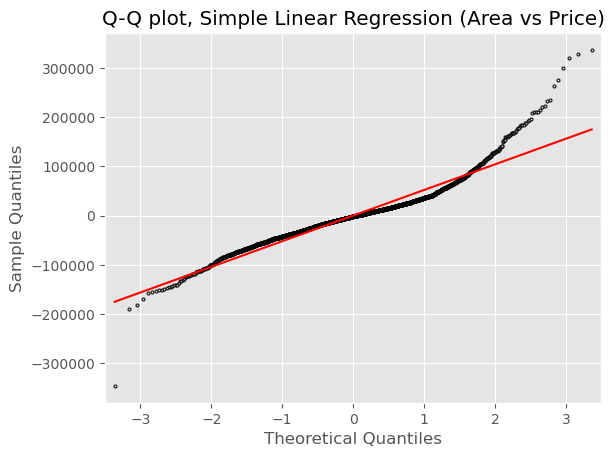

In [84]:
normality_of_residuals_test(lin_reg)

In [42]:
simple.fit(X,np.log10(y))
response = simple.predict(X)
r2 = simple.score(X,np.log10(y))

In [43]:
response

array([[5.06172233],
       [5.10940656],
       [5.09754727],
       ...,
       [5.34486288],
       [5.30533191],
       [5.32237964]])

In [44]:
r2

0.5151088295655105

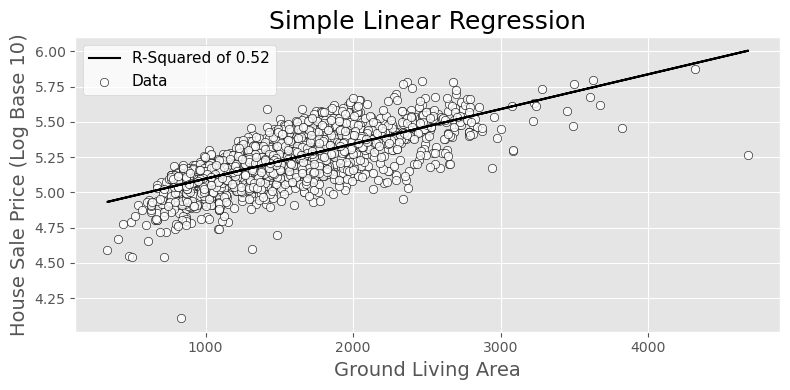

In [46]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='R-Squared of 0.52')
ax.scatter(X, np.log10(y), edgecolor='k', facecolor='white', alpha=0.8, label='Data')
ax.set_ylabel('House Sale Price (Log Base 10)', fontsize=14)
ax.set_xlabel('Ground Living Area', fontsize=14)
#ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
#         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('Simple Linear Regression', fontsize = 18)
#ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()